## Install Requirements and Clone the Ultralytics yolov5 Respository

In [1]:
# Installing the correct (to this date June 2022) pytorch dependency so that the yolov5 model can run on the gpu
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

^C


In [2]:
# Cloning the ultralytics yolov5 repository to the parent directory
!cd .. & git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [ ]:
# Installs all the necessary libraries to train the yolov5 network
!cd ../yolov5 & pip install -r requirements.txt

## Train Model

In [2]:
# Imports
import torch
from matplotlib import pyplot as plt
import numpy as np
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

C:\Users\Nic\anaconda3\envs\BachelorThesis\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Train the yolov5s network, see https://github.com/ultralytics/yolov5 for further information.
# Make sure that you put the "yolo_dataset.yaml" into the cloned yolov5 git repository
!cd ../yolov5 && python train.py --img 320 --batch 16 --epochs 50 --data yolo_dataset.yaml --weights yolov5s.pt --workers 0

train: weights=yolov5s.pt, cfg=, data=yolo_dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=2, batch_size=4, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 54 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v6.1-190-g4d59f65 Python-3.9.7 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce GTX 950M, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t

## Load Model

In [3]:
# Load trained model. 
# For your own trained weights load the weights from the newes yolov5/runs/train/exp folder.
model = torch.hub.load('ultralytics/yolov5', 'custom', path='C:/Users/Nic/Documents/GitHub/yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Nic/.cache\torch\hub\master.zip
YOLOv5  2022-6-6 Python-3.9.7 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce GTX 950M, 4096MiB)

Fusing layers... 
Model summary: 367 layers, 46183668 parameters, 0 gradients
Adding AutoShape... 


In [4]:
# Feed an image to the model and print the detection results
img = os.path.join('data', 'Blender/images', 'car_000002_left.png')
results = model(img)
results.print()

image 1/1: 1080x1920 1 car
Speed: 159.2ms pre-process, 288.0ms inference, 65.6ms NMS per image at shape (1, 3, 384, 640)


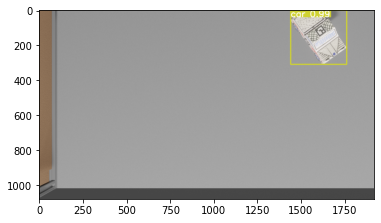

In [5]:
# Visualize the resuslts
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()